comparison of prms6 and bmi-soil.  


In [1]:
import prms6bmi

In [2]:
import geopandas as gpd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
soil_file = Path('B:/gitbmi/bmi-prms6-soil/bmi_prms_soil\irf_ex/pipestem_soil/output/summary_daily.nc')
surf_file = Path('B:/gitbmi/bmi-prms6-soil/bmi_prms_soil/irf_ex/pipestem_surface/output/summary_daily.nc')
prms_file = Path('B:/gitbmi/prms/_build/prms/pipestem/output/summary_daily.nc')
clim_file = Path('B:/gitbmi/prms/_build/prms/pipestem/daymet.nc')
dsoil = xr.open_dataset(soil_file)
dprms = xr.open_dataset(prms_file)
dsurf = xr.open_dataset(surf_file)
clim = xr.open_dataset(clim_file)

In [4]:
clim

<xarray.Dataset>
Dimensions:  (hru: 14, time: 13515)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2016-12-31
  * hru      (hru) int32 57874 57875 57878 57881 ... 57869 57870 57864 57865
Data variables:
    prcp     (time, hru) float32 ...
    tmax     (time, hru) float32 ...
    tmin     (time, hru) float32 ...
Attributes:
    Description:                Climate by HRU
    Bandit_version:             0.6.3
    NHM_version:                ff1b7fc29610bac9f5daa1ca0563d9f6962ddcf0
    history:                    Mon Apr  8 10:11:53 2019: ncks -A tmin.nc day...
    history_of_appended_files:  Mon Apr  8 10:11:53 2019: Appended file tmin....
    NCO:                        netCDF Operators version 4.7.8 (Homepage = ht...

In [5]:
dsoil

<xarray.Dataset>
Dimensions:              (nhru: 14, nsegment: 7, time: 731)
Coordinates:
  * time                 (time) datetime64[ns] 1980-01-01 ... 1981-12-31
Dimensions without coordinates: nhru, nsegment
Data variables:
    nhm_id               (nhru) int32 ...
    nhm_seg              (nsegment) int32 ...
    hru_actet            (time, nhru) float32 ...
    hru_impervevap       (time, nhru) float32 ...
    hru_intcpevap        (time, nhru) float32 ...
    snow_evap            (time, nhru) float32 ...
    perv_actet           (time, nhru) float32 ...
    slow_flow            (time, nhru) float32 ...
    recharge             (time, nhru) float32 ...
    soil_moist           (time, nhru) float32 ...
    soil_to_gw           (time, nhru) float32 ...
    ssr_to_gw            (time, nhru) float32 ...
    dprst_seep_hru       (time, nhru) float64 ...
    dprst_evap_hru       (time, nhru) float32 ...
    infil                (time, nhru) float32 ...
    sroff                (time, nhru

In [6]:
dsurf

<xarray.Dataset>
Dimensions:              (nhru: 14, nsegment: 7, time: 731)
Coordinates:
  * time                 (time) datetime64[ns] 1980-01-01 ... 1981-12-31
Dimensions without coordinates: nhru, nsegment
Data variables:
    nhm_id               (nhru) int32 ...
    nhm_seg              (nsegment) int32 ...
    hru_actet            (time, nhru) float32 ...
    hru_impervevap       (time, nhru) float32 ...
    hru_intcpevap        (time, nhru) float32 ...
    snow_evap            (time, nhru) float32 ...
    perv_actet           (time, nhru) float32 ...
    slow_flow            (time, nhru) float32 ...
    recharge             (time, nhru) float32 ...
    soil_moist           (time, nhru) float32 ...
    soil_to_gw           (time, nhru) float32 ...
    ssr_to_gw            (time, nhru) float32 ...
    dprst_seep_hru       (time, nhru) float64 ...
    dprst_evap_hru       (time, nhru) float32 ...
    infil                (time, nhru) float32 ...
    sroff                (time, nhru

In [7]:
dprms

<xarray.Dataset>
Dimensions:              (nhru: 14, nsegment: 7, time: 731)
Coordinates:
  * time                 (time) datetime64[ns] 1980-01-01 ... 1981-12-31
Dimensions without coordinates: nhru, nsegment
Data variables:
    nhm_id               (nhru) int32 ...
    nhm_seg              (nsegment) int32 ...
    hru_actet            (time, nhru) float32 ...
    hru_impervevap       (time, nhru) float32 ...
    hru_intcpevap        (time, nhru) float32 ...
    snow_evap            (time, nhru) float32 ...
    perv_actet           (time, nhru) float32 ...
    slow_flow            (time, nhru) float32 ...
    recharge             (time, nhru) float32 ...
    soil_moist           (time, nhru) float32 ...
    soil_to_gw           (time, nhru) float32 ...
    ssr_to_gw            (time, nhru) float32 ...
    dprst_seep_hru       (time, nhru) float64 ...
    dprst_evap_hru       (time, nhru) float32 ...
    infil                (time, nhru) float32 ...
    sroff                (time, nhru

Parameters passed from bmi-soil to bmi-surface
#### From climateflow class
* soil_moist
* soil_rechr

#### From potet class
* potet
* basin_potet

### From runoff class
* infil
* sroff
* strm_seg_in


In [9]:
# the following results from a future-warning message so implemented below
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

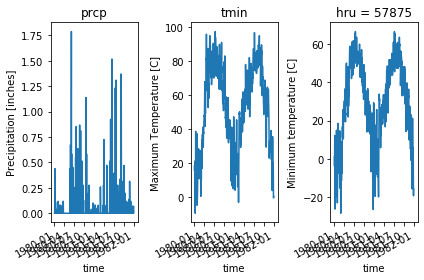

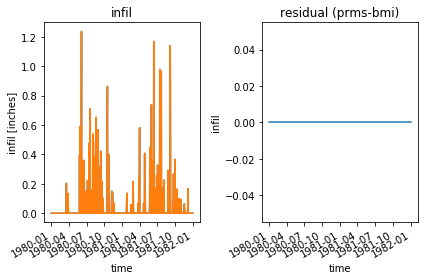

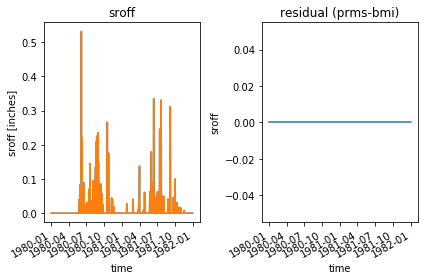

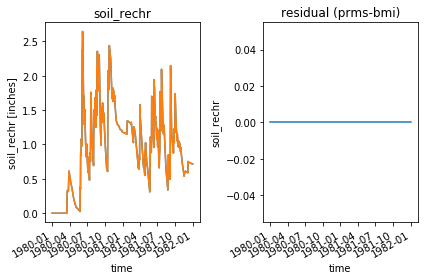

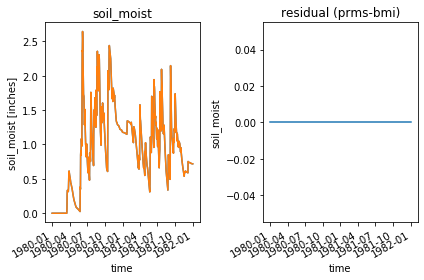

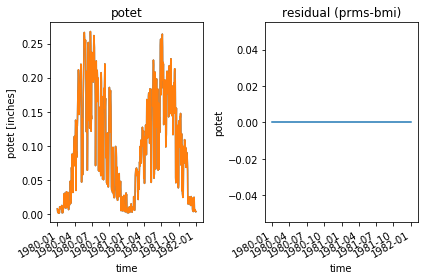

In [10]:

s_prcp = clim.prcp
s_tmax = clim.tmax
s_tmin = clim.tmin
# s_infil = dsoil.infil
# p_infil = dprms.infil
fig, axes = plt.subplots(ncols=3)
s_prcp[1:731,1].plot(ax=axes[0])
s_tmax[1:731,1].plot(ax=axes[1])
s_tmin[1:731,1].plot(ax=axes[2])
# res = p_infil - s_infil
# res[:,1].plot(ax=axes[1])
axes[0].set_title('prcp')
axes[1].set_title('tmax')
axes[1].set_title('tmin')
plt.tight_layout()
plt.draw()

s_infil = dsoil.infil
p_infil = dprms.infil
fig, axes = plt.subplots(ncols=2)
s_infil[:,1].plot(ax=axes[0])
p_infil[:,1].plot(ax=axes[0])
res = p_infil - s_infil
res[:,1].plot(ax=axes[1])
axes[0].set_title('infil')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_sroff = dsoil.sroff
p_sroff = dprms.sroff
fig, axes = plt.subplots(ncols=2)
s_sroff[:,1].plot(ax=axes[0])
p_sroff[:,1].plot(ax=axes[0])
res_sroff = p_sroff - s_sroff
res_sroff[:,1].plot(ax=axes[1])
axes[0].set_title('sroff')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

# s_dflow = dsoil.dunnian_flow
# p_dflow = dprms.dunnian_flow
# fig, axes = plt.subplots(ncols=2)
# s_dflow[:,1].plot(ax=axes[0])
# p_dflow[:,1].plot(ax=axes[0])
# res_sroff = p_dflow - s_dflow
# res_sroff[:,1].plot(ax=axes[1])
# axes[0].set_title('dunnian_flow')
# axes[1].set_title('residual (prms-bmi)')
# plt.tight_layout()
# plt.draw()

s_soil_rechr = dsoil.soil_rechr
# surf_soil_rechr = dsurf.soil_rechr
p_soil_rechr = dprms.soil_rechr
fig, axes = plt.subplots(ncols=2)
s_soil_rechr[:,1].plot(ax=axes[0])
p_soil_rechr[:,1].plot(ax=axes[0])
res = p_soil_rechr - s_soil_rechr
res[:,1].plot(ax=axes[1])
# s_soil_rechr[:,1].plot(ax=axes[2])
# surf_soil_rechr[:,1].plot(ax=axes[2])
# res2 = s_soil_rechr - surf_soil_rechr
# res2[:,1].plot(ax=axes[3])
axes[0].set_title('soil_rechr')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

# s_soil_rechr_max = dsoil.soil_rechr_max
# p_soil_rechr_max = dprms.soil_rechr_max
# fig, axes = plt.subplots(ncols=2)
# s_soil_rechr_max[:,1].plot(ax=axes[0])
# p_soil_rechr_max[:,1].plot(ax=axes[0])
# res = p_soil_rechr_max - s_soil_rechr_max
# res[:,1].plot(ax=axes[1])
# axes[0].set_title('soil_rechr_max')
# axes[1].set_title('residual (prms-bmi)')
# plt.tight_layout()
# plt.draw()

s_smoist = dsoil.soil_moist
p_smoist = dprms.soil_moist
fig, axes = plt.subplots(ncols=2)
s_smoist[:,1].plot(ax=axes[0])
p_smoist[:,1].plot(ax=axes[0])
res = p_smoist - s_smoist
res[:,1].plot(ax=axes[1])
axes[0].set_title('soil_moist')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_potet = dsoil.potet
p_potet = dprms.potet
fig, axes = plt.subplots(ncols=2)
s_potet[:,1].plot(ax=axes[0])
p_potet[:,1].plot(ax=axes[0])
res = p_potet - s_potet
res[:,1].plot(ax=axes[1])
axes[0].set_title('potet')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()


In [ ]:
res_sroff[150:250]
print(np.shape(res_sroff))
print(type(res_sroff))
print(s_sroff[151, 1], p_sroff[151,1], res_sroff[151])
print(s_sroff[151, 1] - p_sroff[151,1])

In [ ]:
print(s_sroff[150:250,1])
print(p_sroff[150:250,1])
print(np.shape(res_sroff))
print(res_sroff[150:250])

In [ ]:
s_smoist = dsoil.soil_moist
p_smoist = dprms.soil_moist
fig, axes = plt.subplots(ncols=2)
s_smoist[:,1].plot(ax=axes[0])
p_smoist[:,1].plot(ax=axes[0])
res = p_smoist - s_smoist
res[:,1].plot(ax=axes[1])
axes[0].set_title('soil_moist')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_actet = dsoil.hru_actet
p_actet = dprms.hru_actet
fig, axes = plt.subplots(ncols=2)
s_actet[:,1].plot(ax=axes[0])
p_actet[:,1].plot(ax=axes[0])
res = s_actet - p_actet
res[:,1].plot(ax=axes[1])
axes[0].set_title('hru_actet')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_slow_flow = dsoil.slow_flow
p_slow_flow = dprms.slow_flow
fig, axes = plt.subplots(ncols=2)
p_slow_flow[:,1].plot(ax=axes[0])
s_slow_flow[:,1].plot(ax=axes[0])
res = p_slow_flow - s_slow_flow
res[:,1].plot(ax=axes[1])
axes[0].set_title('slow_flow')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_rechr = dsoil.recharge
p_rechr = dprms.recharge
fig, axes = plt.subplots(ncols=2)
p_rechr[:,1].plot(ax=axes[0])
s_rechr[:,1].plot(ax=axes[0])
res = p_rechr - s_rechr
res[:,1].plot(ax=axes[1])
axes[0].set_title('recharge')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_smoist = dsoil.soil_moist
p_smoist = dprms.soil_moist
fig, axes = plt.subplots(ncols=2)
s_smoist[:,1].plot(ax=axes[0])
p_smoist[:,1].plot(ax=axes[0])
res = p_smoist - s_smoist
res[:,1].plot(ax=axes[1])
axes[0].set_title('soil_moist')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_potetrechr = dsoil.potet_rechr
p_potetrechr = dprms.potet_rechr
fig, axes = plt.subplots(ncols=2)
s_potetrechr[:,1].plot(ax=axes[0])
p_potetrechr[:,1].plot(ax=axes[0])
res = p_potetrechr - s_potetrechr
res[:,1].plot(ax=axes[1])
axes[0].set_title('potet_rechr')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_potetlower = dsoil.potet_lower
p_potetlower = dprms.potet_lower
fig, axes = plt.subplots(ncols=2)
s_potetlower[:,1].plot(ax=axes[0])
p_potetlower[:,1].plot(ax=axes[0])
res = p_potetlower - s_potetlower
res[:,1].plot(ax=axes[1])
axes[0].set_title('potet_lower')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_infil = dsoil.infil
p_infil = dprms.infil
fig, axes = plt.subplots(ncols=2)
s_infil[:,1].plot(ax=axes[0])
p_infil[:,1].plot(ax=axes[0])
res = p_infil - s_infil
res[:,1].plot(ax=axes[1])
axes[0].set_title('infil')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_pkwe = dsurf.pkwater_equiv
p_pkwe = dprms.pkwater_equiv
fig, axes = plt.subplots(ncols=2)
s_pkwe[:,1].plot(ax=axes[0])
p_pkwe[:,1].plot(ax=axes[0])
res = p_pkwe - s_pkwe
res[:,1].plot(ax=axes[1])
axes[0].set_title('pkwater_equiv')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_snwm = dsurf.snowmelt
p_snwm = dprms.snowmelt
fig, axes = plt.subplots(ncols=2)
s_snwm[:,1].plot(ax=axes[0])
p_snwm[:,1].plot(ax=axes[0])
res = p_snwm - s_snwm
res[:,1].plot(ax=axes[1])
axes[0].set_title('snowmelt')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_soil_rechr = dsoil.soil_rechr
surf_soil_rechr = dsurf.soil_rechr
p_soil_rechr = dprms.soil_rechr
fig, axes = plt.subplots(ncols=2)
s_soil_rechr[:,1].plot(ax=axes[0])
p_soil_rechr[:,1].plot(ax=axes[0])
res = p_soil_rechr - s_soil_rechr
res[:,1].plot(ax=axes[1])
# s_soil_rechr[:,1].plot(ax=axes[2])
# surf_soil_rechr[:,1].plot(ax=axes[2])
# res2 = s_soil_rechr - surf_soil_rechr
# res2[:,1].plot(ax=axes[3])
axes[0].set_title('soil_rechr')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_cnfr = dsurf.contrib_fraction
p_cnfr = dprms.contrib_fraction
fig, axes = plt.subplots(ncols=2)
s_cnfr[:,1].plot(ax=axes[0])
p_cnfr[:,1].plot(ax=axes[0])
res = p_cnfr - s_cnfr
res[:,1].plot(ax=axes[1])
axes[0].set_title('contrib_fraction')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_soil_rechr = dsoil.soil_rechr
surf_soil_rechr = dsurf.soil_rechr
p_soil_rechr = dprms.soil_rechr
fig, axes = plt.subplots(ncols=2)
# s_soil_rechr[:,1].plot(ax=axes[0])
# p_soil_rechr[:,1].plot(ax=axes[0])
# res = p_soil_rechr - s_soil_rechr
# res[:,1].plot(ax=axes[1])
s_soil_rechr[:,1].plot(ax=axes[0])
surf_soil_rechr[:,1].plot(ax=axes[0],linestyle="--")
res2 = s_soil_rechr - surf_soil_rechr
res2[:,1].plot(ax=axes[1])
axes[0].set_title('soil_rechr')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
res2[:,1].plot()
# (s_soil_rechr[:,1]+0.1).plot()
# surf_soil_rechr[:,1].plot()

In [ ]:
print(res2[150:250,1])
print(s_soil_rechr[150:250,1])
print(surf_soil_rechr[150:250,1])

In [ ]:


s_impervevap = dsoil.hru_impervevap
p_impervevap = dprms.hru_impervevap
fig, axes = plt.subplots(ncols=2)
p_impervevap[:,1].plot(ax=axes[0])
s_impervevap[:,1].plot(ax=axes[0])
res = p_impervevap - s_impervevap
res[:,1].plot(ax=axes[1])
axes[0].set_title('hru_impervevap')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_intcpevap = dsoil.hru_intcpevap
p_intcpevap = dprms.hru_intcpevap
fig, axes = plt.subplots(ncols=2)
p_intcpevap[:,1].plot(ax=axes[0])
s_intcpevap[:,1].plot(ax=axes[0])
res = p_intcpevap - s_intcpevap
res[:,1].plot(ax=axes[1])
axes[0].set_title('hru_intcpevap')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_snowevap = dsoil.snow_evap
p_snowevap = dprms.snow_evap
fig, axes = plt.subplots(ncols=2)
p_snowevap[:,1].plot(ax=axes[0])
s_snowevap[:,1].plot(ax=axes[0])
res = p_snowevap - s_snowevap
res[:,1].plot(ax=axes[1])
axes[0].set_title('snow_evap')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_dprstevap = dsoil.dprst_evap_hru
p_dprstevap = dprms.dprst_evap_hru
fig, axes = plt.subplots(ncols=2)
p_dprstevap[:,1].plot(ax=axes[0])
s_dprstevap[:,1].plot(ax=axes[0])
res = p_dprstevap - s_dprstevap
res[:,1].plot(ax=axes[1])
axes[0].set_title('dprst_evap_hru')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

s_pervactet = dsoil.perv_actet
p_pervactet = dprms.perv_actet
fig, axes = plt.subplots(ncols=2)
p_pervactet[:,1].plot(ax=axes[0])
s_pervactet[:,1].plot(ax=axes[0])
res = p_pervactet - s_pervactet
res[:,1].plot(ax=axes[1])
axes[0].set_title('perv_actet')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()


s_soil_rechr = dsoil.soil_rechr
p_soil_rechr = dprms.soil_rechr
fig, axes = plt.subplots(ncols=2)
s_soil_rechr[:,1].plot(ax=axes[0])
p_soil_rechr[:,1].plot(ax=axes[0])
res = p_soil_rechr - s_soil_rechr
res[:,1].plot(ax=axes[1])
axes[0].set_title('soil_rechr')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_actet = dsoil.slow_flow
p_actet = dprms.slow_flow
fig, axes = plt.subplots(ncols=2)
p_actet[:,1].plot(ax=axes[0])
s_actet[:,1].plot(ax=axes[0])
res = p_actet - s_actet
res[:,1].plot(ax=axes[1])
axes[0].set_title('slow_flow')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_rechr = dsoil.recharge
p_rechr = dprms.recharge
fig, axes = plt.subplots(ncols=2)
p_rechr[:,1].plot(ax=axes[0])
s_rechr[:,1].plot(ax=axes[0])
res = p_rechr - s_rechr
res[:,1].plot(ax=axes[1])
axes[0].set_title('recharge')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_s2gw = dsoil.soil_to_gw
p_s2gw = dprms.soil_to_gw
fig, axes = plt.subplots(ncols=2)
p_s2gw[:,1].plot(ax=axes[0])
s_s2gw[:,1].plot(ax=axes[0])
res = p_s2gw - s_s2gw
res[:,1].plot(ax=axes[1])
axes[0].set_title('soil_to_gw')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_ssr2gw = dsoil.ssr_to_gw
p_ssr2gw = dprms.ssr_to_gw
fig, axes = plt.subplots(ncols=2)
p_ssr2gw[:,1].plot(ax=axes[0])
s_ssr2gw[:,1].plot(ax=axes[0])
res = p_ssr2gw - s_ssr2gw
res[:,1].plot(ax=axes[1])
axes[0].set_title('ssr_to_gw')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_dprstseep = dsoil.dprst_seep_hru
p_dprstseep = dprms.dprst_seep_hru
fig, axes = plt.subplots(ncols=2)
p_dprstseep[:,1].plot(ax=axes[0])
s_dprstseep[:,1].plot(ax=axes[0])
res = p_dprstseep - s_dprstseep
res[:,1].plot(ax=axes[1])
axes[0].set_title('dprst_seep_hru')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_impervevap = dsoil.hru_impervevap
p_impervevap = dprms.hru_impervevap
fig, axes = plt.subplots(ncols=2)
p_impervevap[:,1].plot(ax=axes[0])
s_impervevap[:,1].plot(ax=axes[0])
res = p_impervevap - s_impervevap
res[:,1].plot(ax=axes[1])
axes[0].set_title('hru_impervevap')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_intcpevap = dsoil.hru_intcpevap
p_iintcpevap = dprms.hru_intcpevap
fig, axes = plt.subplots(ncols=2)
p_iintcpevap[:,1].plot(ax=axes[0])
s_intcpevap[:,1].plot(ax=axes[0])
res = p_iintcpevap - s_intcpevap
res[:,1].plot(ax=axes[1])
axes[0].set_title('hru_intcpevap')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_snowevap = dsoil.snow_evap
p_snowevap = dprms.snow_evap
fig, axes = plt.subplots(ncols=2)
p_iintcpevap[:,1].plot(ax=axes[0])
s_snowevap[:,1].plot(ax=axes[0])
res = p_snowevap - s_snowevap
res[:,1].plot(ax=axes[1])
axes[0].set_title('snow_evap')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()

In [ ]:
s_dprstevap = dsoil.dprst_evap_hru
p_dprstevap = dprms.dprst_evap_hru
fig, axes = plt.subplots(ncols=2)
p_iintcpevap[:,1].plot(ax=axes[0])
s_snowevap[:,1].plot(ax=axes[0])
res = p_snowevap - s_snowevap
res[:,1].plot(ax=axes[1])
axes[0].set_title('snow_evap')
axes[1].set_title('residual (prms-bmi)')
plt.tight_layout()
plt.draw()